<a href="https://colab.research.google.com/github/adel-abh/Generatin-random-recipies-using-LSTM/blob/main/Random_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random
import time
import itertools
import plotly.express as px
import seaborn as sns
import statistics
import matplotlib.pyplot as plt
from utils import calculate_frequency,lookup_set,avg_flavor
import json


In [ ]:
data2=pd.read_csv('FlavorDB\\flavor_db.csv')
food=pd.read_csv('Data_food_final.csv')
# ingredient_count contains the occurence of each ingredient in the dataset
with open('occurrence (1).json') as json_file:
    occurence_dic = json.load(json_file)

    print(occurence_dic)

In [ ]:


list_ingredients = set([col for col in occurence_dic.keys()])  # create a set of ingredients
avg_values = []
recipes = []
nb_recipes =348  # number of recipes to generate
taille = 11  # recipe length
iterations = 100  # number of iterations

for _ in range(iterations):
    for _ in range(nb_recipes):
        recipe = [list(list_ingredients)[np.random.randint(0, len(list_ingredients))] for _ in range(taille)]
        recipes.append(recipe)

    df = pd.DataFrame()
    df['recipes'] = recipes
    df['Ingredients_string'] = df.recipes.apply(lambda x: dict.fromkeys(x, " "))

    for element in df['Ingredients_string']:
        for k, v in element.items():
            element[k] = lookup_set(k, data2[['alias', 'molecules']])

    df['avg_flavor'] = df['Ingredients_string'].apply(lambda x: avg_flavor(x))
    final_score = sum(df['avg_flavor']) / df['avg_flavor'].shape[0]
    avg_values.append(34.275600390776006 - final_score)
    recipes = []  # Réinitialiser la liste des recettes pour chaque itération



In [ ]:
avg_values

In [ ]:
# count negative values
count=0
for i in avg_values:
    if i <0:
        count=count+1
print(count)

100


In [ ]:
# count potive values
count1=0
for i in avg_values:
    if i >0:
        count1=count1+1
print(count1)

[Text(0.5, 1.0, 'Initial Pool Size = 15')]

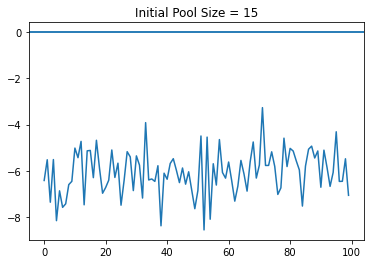

In [ ]:
x = [i for i in range(len(avg_values))]
graph = sns.lineplot(x=x, y=avg_values)
graph.axhline(0)
graph.axhline(0)
#graph.set(title='Initial Pool Size = 15')




In [ ]:
min_value,max_value,mean=min(avg_values),max(avg_values),statistics.mean(avg_values)
print(f'the min is {min_value}')
print(f'the max is {max_value}')
print(f'the mean is {mean}')

the min is -8.565227012982426
the max is -3.26685764607862
the mean is -6.058713078481429


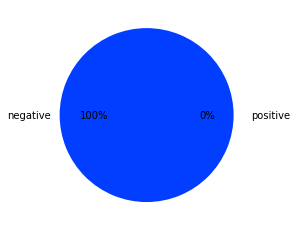

In [ ]:

data = [count,count1]
keys = ['negative','positive']

# declaring exploding pie
explode = [0, 0.1]
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color,
		explode=explode, autopct='%.0f%%')

# displaying chart
plt.show()
